# ZOMATO DATA ANALYSIS PROJECT 

In [2]:
import pandas as pd                         #for data manipulation and analysis
import numpy as np                          #for numerical operations
import matplotlib.pyplot as plt             #for data visulaizations
import seaborn as sns

## Create dataframe

In [3]:
df=pd.read_csv("Zomato data .csv")

In [4]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Data Cleaning

### i)Convert datatype of column- rate

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### ii) Checking for NULL values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### NO NULL VALUES

### Q1 WHAT TYPE OF RETRAUNT DO MAJORITY OF CUSTOMERS ORDER FROM?

Text(0.5, 0, 'Types of Restraunt')

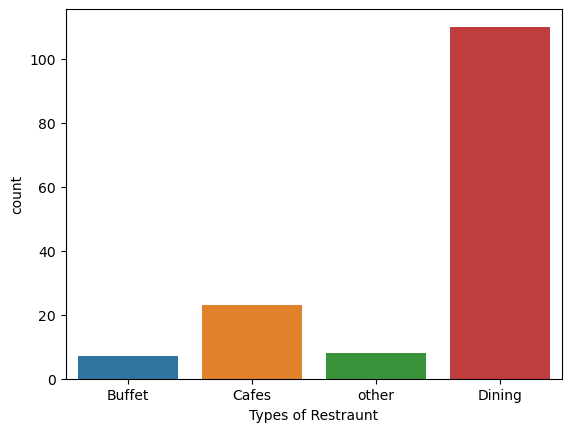

In [7]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of Restraunt')

### ANSWER : Majority of customer's use dining

### Q2 How many votes has each type of restraunt recienved from customer

Text(0.5, 1.0, 'Total Votes by Restaurant Type')

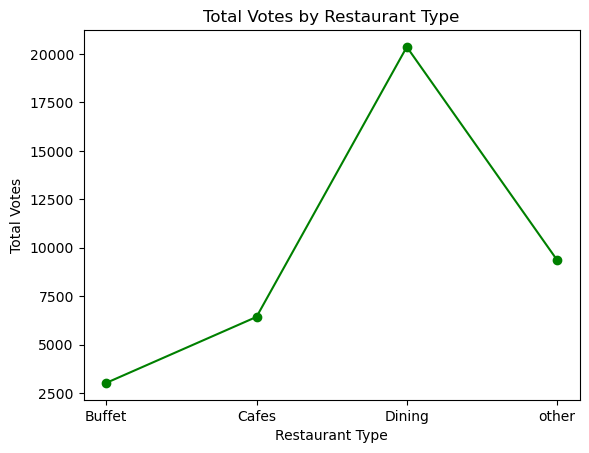

In [8]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green', marker = 'o')
plt.xlabel('Restaurant Type') 
plt.ylabel('Total Votes')
plt.title('Total Votes by Restaurant Type') 



## Ques What are the ratings that the majority of restaurants have received?

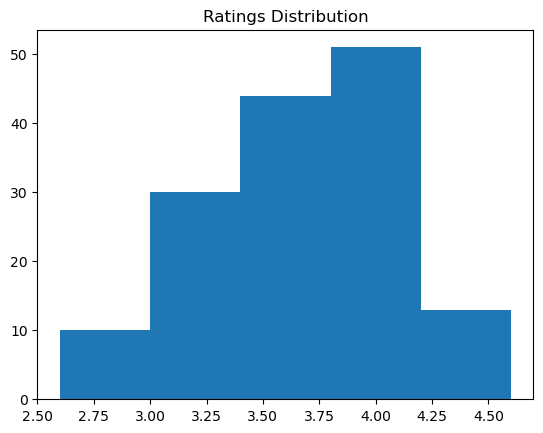

In [9]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

## Ans. The majority of restraunts received ratings from 3.5 to 4

## Ques : Zomato has observed that most couples order most of their food online. What is their average spending on each order?


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

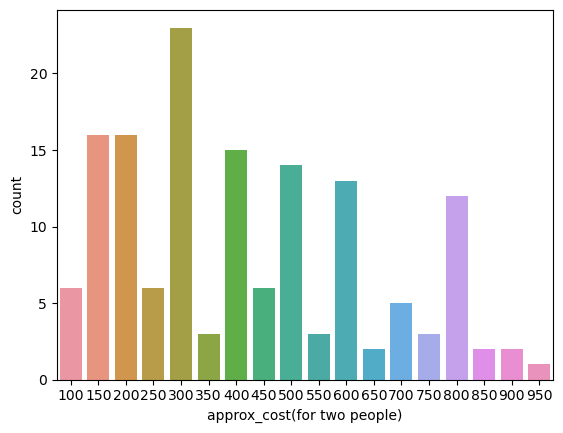

In [10]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Ans The majority of couples prefer restraunts with an approximate cost of 300

## Ques : Which mode (online or offline) has received the maximum rating?

<AxesSubplot:xlabel='online_order', ylabel='rate'>

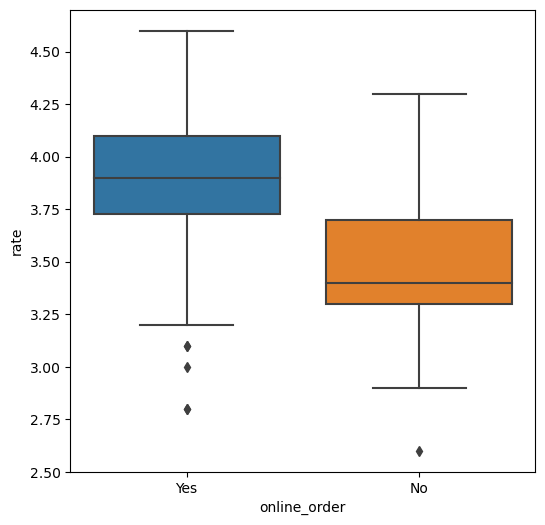

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data=df)

## ANS: Offline orders receiced lower ratings as compared to the online orders 

## Ques : Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

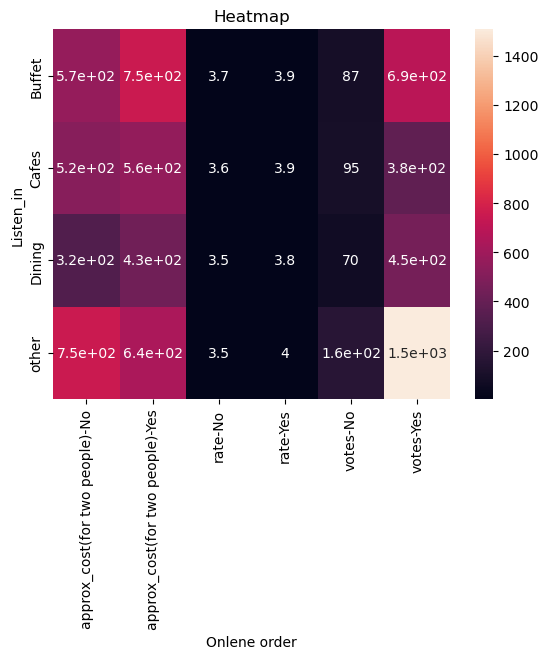

In [14]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order')
sns.heatmap(pivot_table,annot=True)
plt.title('Heatmap')
plt.xlabel('Onlene order')
plt.ylabel('Listen_in')
plt.show()